# Amsterdam Event Data

## Table of Contents
1. [Imports](#imports)
2. [Import File](#importFile)
    1. [Example Contents](#exampleContents)
3. [Construction Full DataFrame](#fullDF)
4. [DataaFrame to CSV](#CSV)

## Imports <a name="imports"></a>

In [9]:
#Read JSON files
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## Import Events file <a name="importFile"></a>
Import the open data file 

In [4]:
with open("../../../Data_thesis/Open_Data/Evenementen.json") as event_data:
    events = json.load(event_data)

### Example contents <a name="exampleContents"></a>
Below is an example snippet of an event in the file

In [5]:
#Return eventname
print("Event: ", events[0]["title"])

#Return exact location event in human terms
print("City: ", events[0]["location"]["city"])
print("Adress: ", events[0]["location"]["adress"])
print("Zipcode: ", events[0]["location"]["zipcode"])

#Check source crowdedness
print("Coordinates: ", events[0]["location"]["latitude"], events[0]["location"]["longitude"]) 

#Check whether the data has an event
print("Date: ", events[0]["dates"])

Event:  Springsnow Festival
City:  AMSTERDAM
Adress:  Diverse locaties / Various locations
Zipcode:  1012 JS
Coordinates:  52,3726380 4,8941060
Date:  {'startdate': '20-04-2018', 'enddate': '20-05-2018'}


## Full Dataset <a name="fullDF"></a>
As not all the variables are usable, we make a subset of the following variables:
- *Event Name*: Show the event name
- *Coordinates*: Show the coordinates of the event
- *Data*: Show the event date(s)

In [6]:
#Save all the events in the list
events_dict = {}

#Loop over all the events
j = 0
for event in events: 
    #Temporary save dates
    dates = []
    
    #Check if saved in format one or two
    if "startdate" in event["dates"]: 
        dates.append(event["dates"]["startdate"])
        dates.append(event["dates"]["enddate"])
    elif "singles" in event["dates"]:
        dates = event["dates"]["singles"]
                
    for date in dates:
        date = datetime.datetime.strptime(date, "%d-%m-%Y")
        date = date.date()
        
        lat = float(event["location"]["latitude"].replace(",", "."))
        lon = float(event["location"]["longitude"].replace(",", "."))
        #Dict with all data single event
        event_date = {"Date": date, "Event": event["title"], "Latitude": lat,"Longtitude": lon}
    
        #Append dict to list
        events_dict[j] = event_date
        j += 1

In [7]:
df = pd.DataFrame.from_dict(events_dict, orient="index")

In [8]:
df.head()

,Date,Event,Latitude,Longtitude
0,2018-04-20,Springsnow Festival,52.372638,4.894106
1,2018-05-20,Springsnow Festival,52.372638,4.894106
2,2018-05-20,Vurige Tongen,52.410332,4.749069
3,2018-05-21,Vurige Tongen,52.410332,4.749069
4,2018-06-03,Sneakerness,52.382834,4.920456


## Visualizations 

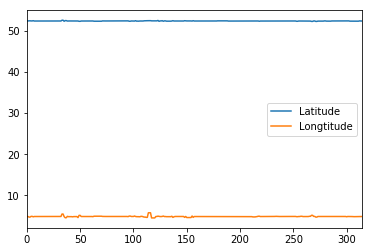

In [11]:
df.plot()
plt.show()

## Save to file <a name="CSV"></a>
Save the list of subset events to file

In [19]:
df.to_csv("../../../Data_thesis/Full_Datasets/Events.csv", index=False)